**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

**Answering questions like**
- Are women spending more money per transaction than men? Why or Why not?
- Confidence intervals and distribution of the mean of the expenses by female and male customers.
- Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
- Results when the same activity is performed for Married vs Unmarried.
- Results when the same activity is performed for Age.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

from scipy.stats import binom, geom

In [2]:
# Importing the dataset
df = pd.read_csv("walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
# creating a copy of dataframe to retrive the original df later.
df2 = df.copy()


In [4]:
# as we can notice, the copy created is a deep copy
np.shares_memory(df, df2)

False

# Analysing basic metrics

In [5]:
df.shape

(550068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# Fetching no. of unique values in each column of dataframe df
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [11]:
# converting "User_ID", "Occupation", "Marital_Status", "Product_Category" columns to categorical variables
df[["User_ID", "Occupation", "Marital_Status", "Product_Category"]] = df[["User_ID", "Occupation", "Marital_Status", "Product_Category"]].astype("object")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [13]:
# checking the characteristics of columns 
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [14]:
# There are no duplicate values in df
df[df.duplicated()==True]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [15]:
# checking for null values if any
df.isnull().sum().sum()

0

In [16]:
# First of all we need to groupby User_ID
dfg = df.groupby(["User_ID"])
dfg.ngroups

5891

so there are 5891 total users who purchased on Black Friday

In [17]:
df.groupby("Gender")["User_ID"].nunique()


Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [18]:
dfg.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                 13650       1
         P00004842   F       0-17   10          A              2                           0               3                 13645       1
         P00142242   F       0-17   10          A              2                           0               8                 7882        1
         P00297042   F       0-17   10          A              2                           0               8                 7839        1
         P00289942   F       0-17   10          A              2                           0               3                 10900       1
                                                                                                                                        ..
1006040  P00146442   M       26-

## Purchase distribution as per Age

In [20]:
# Checking the data on unique User_ID and Age
# Analysing fraction of no. of purchases as per Age

grouped_userid_age=df.groupby(["User_ID"])["Age"].unique()
t1 = grouped_userid_age.value_counts()/len(grouped_userid_age)*100
t1

[26-35]    34.849771
[36-45]    19.809879
[18-25]    18.146325
[46-50]     9.013750
[51-55]     8.164997
[55+]       6.314717
[0-17]      3.700560
Name: Age, dtype: float64

In [21]:
# Analysing sales revenue as per Age
t2 = (df.groupby(["Age"])["Purchase"].sum()/df["Purchase"].sum()).sort_values(ascending = False)*100
t2

Age
26-35    39.871374
36-45    20.145361
18-25    17.933325
46-50     8.258612
51-55     7.203947
55+       3.939850
0-17      2.647530
Name: Purchase, dtype: float64

In [22]:
t2.values

array([39.87137442, 20.14536122, 17.93332529,  8.25861201,  7.2039469 ,
        3.93984993,  2.64753023])

In [23]:
t2.index

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object', name='Age')

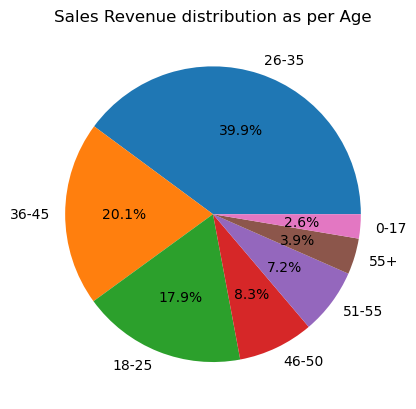

In [24]:
plt.title("Sales Revenue distribution as per Age")
plt.pie(t2, labels = t2.index, autopct = "%.1f%%")
plt.show()

## Purchase distribution as per City_Category

In [25]:
# Analysing count of purchases as per City category

grouped_userid_citycat=df.groupby(["User_ID"])["City_Category"].unique()
t1 = grouped_userid_citycat.value_counts()/len(grouped_userid_citycat)*100
t1

[C]    53.284672
[B]    28.976405
[A]    17.738924
Name: City_Category, dtype: float64

In [26]:
# Analysing sales revenue as per City category
t2 = (df.groupby(["City_Category"])["Purchase"].sum()/df["Purchase"].sum()).sort_values(ascending = False)*100
t2

City_Category
B    41.515136
C    32.650483
A    25.834381
Name: Purchase, dtype: float64

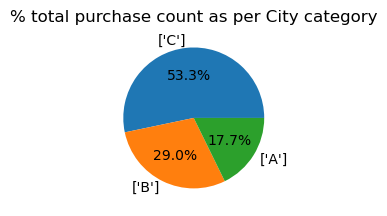

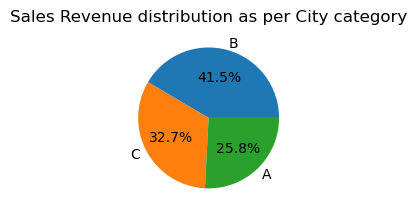

In [27]:
plt.figure(figsize = (5, 6))
plt.subplot(1,2,1)
plt.title("% total purchase count as per City category")
plt.pie(t1, labels = t1.index, autopct = "%.1f%%")
plt.show()

plt.figure(figsize = (5, 6))
plt.subplot(1,2,2)
plt.title("Sales Revenue distribution as per City category")
plt.pie(t2, labels = t2.index, autopct = "%.1f%%")
plt.show()

## Purchase distribution as per Gender

In [28]:
# Analysing count of purchases as per Gender

grouped_userid_gender=df.groupby(["User_ID"])["Gender"].unique()
t1 = grouped_userid_gender.value_counts()/len(grouped_userid_gender)*100
t1

[M]    71.719572
[F]    28.280428
Name: Gender, dtype: float64

In [29]:
# Analysing sales revenue as per Gender
t2 = (df.groupby(["Gender"])["Purchase"].sum()/df["Purchase"].sum()).sort_values(ascending = False)*100
t2

Gender
M    76.721424
F    23.278576
Name: Purchase, dtype: float64

## Purchase distribution as per Marital_Status

In [30]:
# Analysing count of purchases as per Marital_Status

grouped_userid_marital = df.groupby(["User_ID"])["Marital_Status"].unique()
t1 = grouped_userid_marital.value_counts()/len(grouped_userid_marital)*100
t1

[0]    58.003735
[1]    41.996265
Name: Marital_Status, dtype: float64

In [31]:
# Analysing sales revenue as per Gender
t2 = (df.groupby(["Marital_Status"])["Purchase"].sum()/df["Purchase"].sum()).sort_values(ascending = False)*100
t2

Marital_Status
0    59.047057
1    40.952943
Name: Purchase, dtype: float64

## Purchase distribution as per Stay_In_Current_City_Years

In [32]:
# Analysing count of purchases as per Stay_In_Current_City_Years

grouped_userid_city_stay = df.groupby(["User_ID"])["Stay_In_Current_City_Years"].unique()
t1 = grouped_userid_city_stay.value_counts()/len(grouped_userid_city_stay)*100
t1

[1]     35.409947
[2]     19.436428
[3]     16.618571
[4+]    15.430317
[0]     13.104736
Name: Stay_In_Current_City_Years, dtype: float64

In [33]:
# Analysing sales revenue as per Stay_In_Current_City_Years
t2 = (df.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum()/df["Purchase"].sum()).sort_values(ascending = False)*100
t2

Stay_In_Current_City_Years
1     35.183250
2     18.626547
3     17.365290
4+    15.422160
0     13.402754
Name: Purchase, dtype: float64

# Visual Analysis:

In [34]:
grouped_citycat=pd.DataFrame(df.groupby(["City_Category"])["User_ID"].nunique())
grouped_citycat.reset_index(inplace = True)
grouped_citycat.rename(columns={"User_ID": "No. of users"}, inplace = True)

In [35]:
grouped_citycat

,City_Category,No. of users
0,A,1045
1,B,1707
2,C,3139


<Axes: xlabel='City_Category', ylabel='No. of users'>

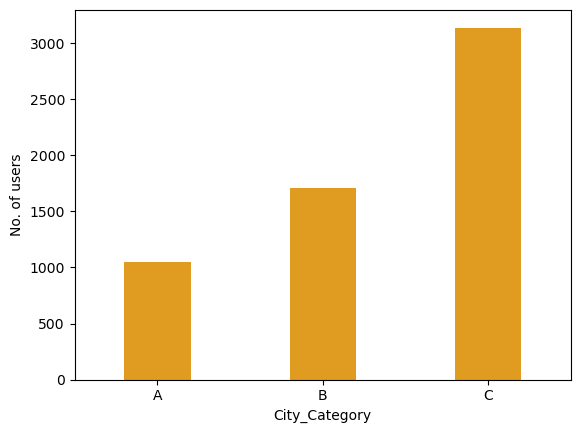

In [36]:
sns.barplot(data=grouped_citycat, x="City_Category", y = "No. of users", width = 0.4, color='orange')

In [37]:
grouped_citycat_marital = pd.DataFrame(df.groupby(["City_Category", "Marital_Status"])["User_ID"].nunique())
grouped_citycat_marital.reset_index(inplace = True)
grouped_citycat_marital.rename(columns={"User_ID": "No. of users"}, inplace = True)

In [38]:
grouped_citycat_marital

,City_Category,Marital_Status,No. of users
0,A,0,652
1,A,1,393
2,B,0,1004
3,B,1,703
4,C,0,1761
5,C,1,1378


<Axes: xlabel='City_Category', ylabel='No. of users'>

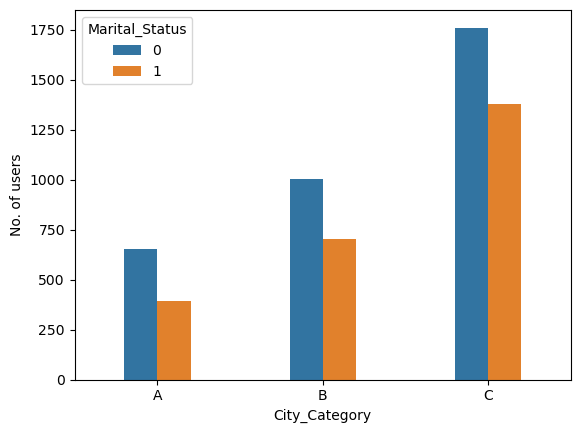

In [39]:
sns.barplot(data=grouped_citycat_marital, x="City_Category", y = "No. of users", width = 0.4, hue = "Marital_Status")

In [101]:
grouped_gender_age = pd.DataFrame(df.groupby(["Gender", "Age"])["Purchase"].sum())
grouped_gender_age.reset_index(inplace = True)
grouped_gender_age.rename(columns={"Purchase": "Total_Sales_Revenue"}, inplace = True)

In [110]:
grouped_gender_age.columns

Index(['Gender', 'Age', 'Total_Sales_Revenue'], dtype='object')

<Axes: xlabel='Age', ylabel='Total_Sales_Revenue'>

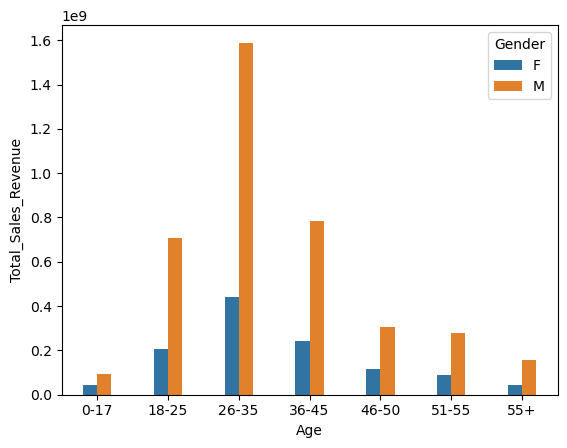

In [112]:
sns.barplot(data=grouped_gender_age, x="Age", y = "Total_Sales_Revenue", width = 0.4, hue = "Gender")

In [40]:
grouped_citycat_age = pd.DataFrame(df.groupby(["City_Category", "Age"])["Purchase"].sum())
grouped_citycat_age.reset_index(inplace = True)
grouped_citycat_age.rename(columns={"Purchase": "Total_Sales_Revenue"}, inplace = True)

In [41]:
grouped_citycat_age

,City_Category,Age,Total_Sales_Revenue
0,A,0-17,21916841
1,A,18-25,243236868
2,A,26-35,660202334
3,A,36-45,239295720
4,A,46-50,63507243
5,A,51-55,57992372
6,A,55+,30320283
7,B,0-17,48465500
8,B,18-25,390594232
9,B,26-35,837919708


<Axes: xlabel='City_Category', ylabel='Total_Sales_Revenue'>

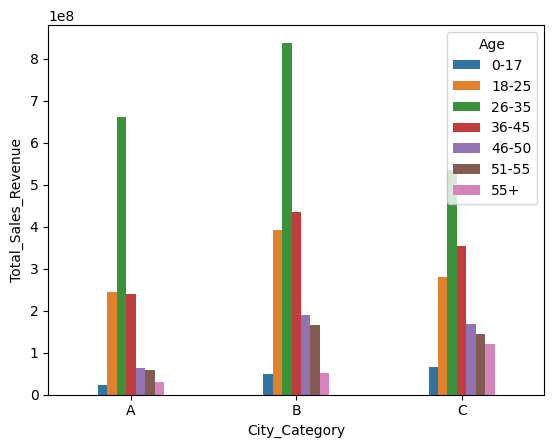

In [42]:
sns.barplot(data=grouped_citycat_age, x="City_Category", y = "Total_Sales_Revenue", width = 0.4, hue = "Age")

In [43]:
grouped_stay_citycat = pd.DataFrame(df.groupby(["Stay_In_Current_City_Years", "City_Category"])["Purchase"].sum())
grouped_stay_citycat.reset_index(inplace = True)
grouped_stay_citycat.rename(columns={"Purchase": "Total_Sales_Revenue"}, inplace = True)

In [44]:
grouped_stay_citycat

,Stay_In_Current_City_Years,City_Category,Total_Sales_Revenue
0,0,A,217277717
1,0,B,255389454
2,0,C,210312058
3,1,A,437761817
4,1,B,765647432
5,1,C,589463284
6,2,A,243224188
7,2,B,384010246
8,2,C,321939497
9,3,A,221128667


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Total_Sales_Revenue'>

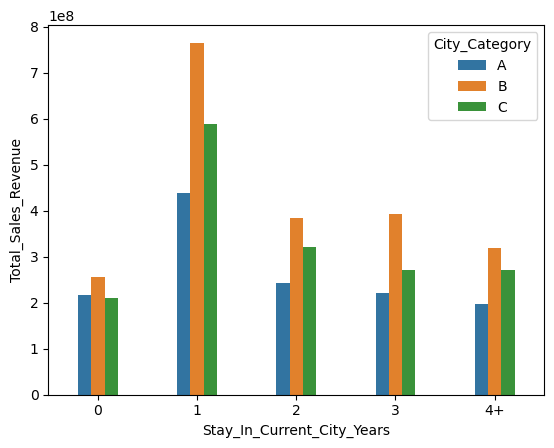

In [45]:
sns.barplot(data=grouped_stay_citycat, x="Stay_In_Current_City_Years", y = "Total_Sales_Revenue", width = 0.4, hue = "City_Category")

In [46]:
grouped_occupation = pd.DataFrame(df.groupby(["Occupation"])["Purchase"].mean())
grouped_occupation.reset_index(inplace = True)
grouped_occupation.rename(columns={"Purchase": "Mean_Purchase"}, inplace = True)

In [47]:
grouped_occupation

,Occupation,Mean_Purchase
0,0,9124.428588
1,1,8953.193270
2,2,8952.481683
3,3,9178.593088
4,4,9213.980251
5,5,9333.149298
6,6,9256.535691
7,7,9425.728223
8,8,9532.592497
9,9,8637.743761


<Axes: xlabel='Occupation', ylabel='Mean_Purchase'>

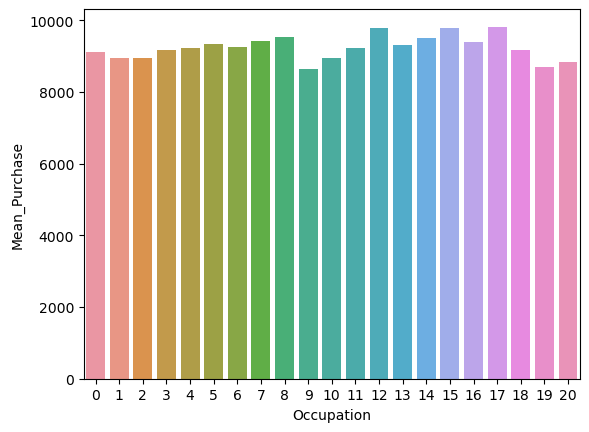

In [48]:
sns.barplot(grouped_occupation, x="Occupation", y="Mean_Purchase")

In [49]:
grouped_prodcat_citycat = pd.DataFrame(df.groupby(["Product_Category", "City_Category"])["Purchase"].sum())
grouped_prodcat_citycat.reset_index(inplace=True)
grouped_prodcat_citycat.rename(columns={"Purchase": "Total_Purchase"}, inplace = True)
grouped_prodcat_citycat.sort_values(["Total_Purchase"], ascending=False, inplace=True)


In [50]:
grouped_prodcat_citycat

,Product_Category,City_Category,Total_Purchase
1,1,B,782682980
2,1,C,669622760
0,1,A,457708014
13,5,B,395641152
22,8,B,354497531
14,5,C,287953960
23,8,C,264011395
12,5,A,258240117
21,8,A,235809873
16,6,B,134293052


<Axes: xlabel='Product_Category', ylabel='Total_Purchase'>

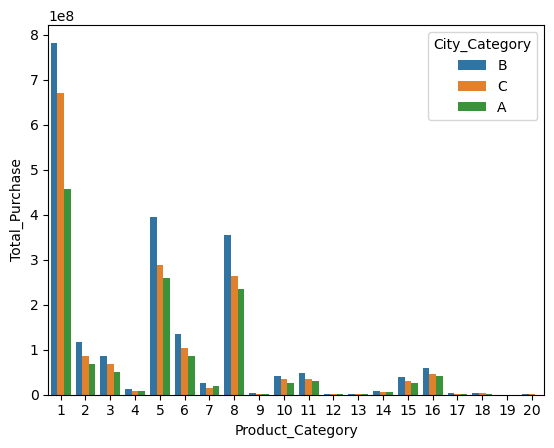

In [51]:
sns.barplot(grouped_prodcat_citycat, x="Product_Category", y="Total_Purchase", hue="City_Category")

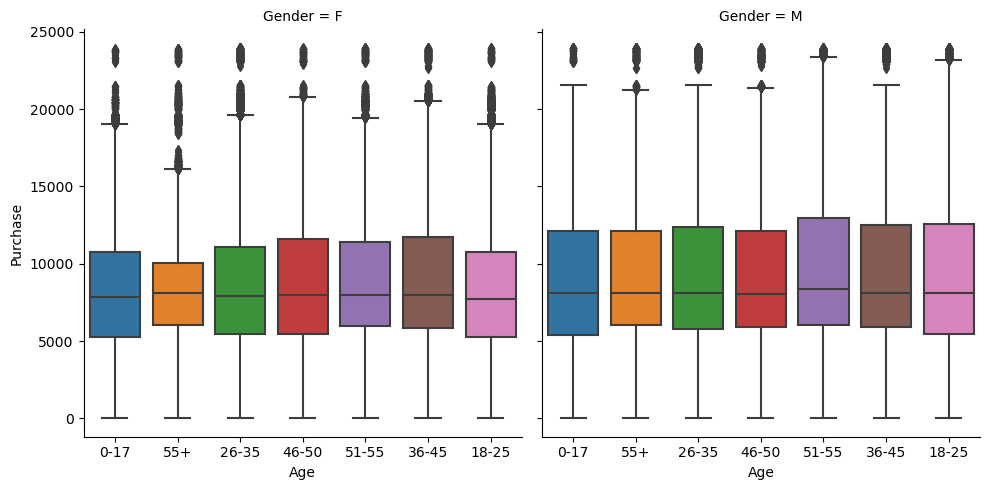

In [52]:
sns.catplot(df, x="Age", y="Purchase", col = "Gender", kind = "box")

<Axes: xlabel='Age', ylabel='count'>

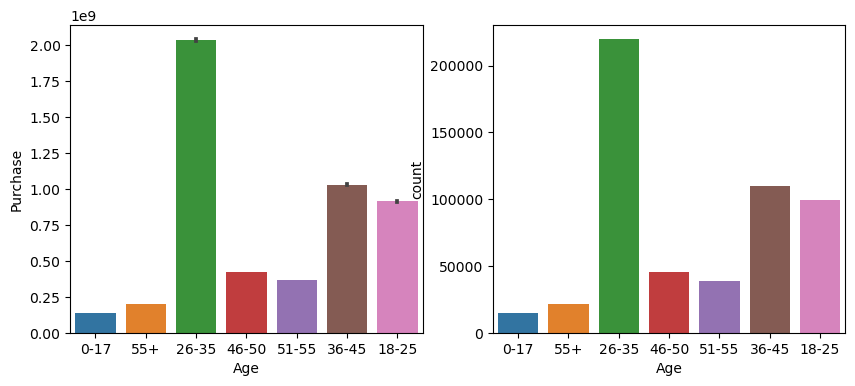

In [53]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.barplot(df, x="Age", y="Purchase", estimator = "sum")

plt.subplot(1,2,2)
sns.countplot(df, x="Age")

# Applying CLT:

## Are women spending more money per transaction than men?

In [54]:
# First of all we need to group by User_ID
dfg = df.groupby("User_ID")
dfg.ngroups

5891

In [55]:
# Saving the mean purchase amount of each User_ID according to gender
pur_sum_m = df[df["Gender"]=="M"].groupby("User_ID")["Purchase"].sum()
pur_sum_f = df[df["Gender"]=="F"].groupby("User_ID")["Purchase"].sum()

In [56]:
len(pur_sum_m) + len(pur_sum_f)
# sum of male and female groups is equal to total users

5891

In [57]:
print(f"avg money spent per transaction by male: {pur_sum_m.mean()}")
print(f"avg money spent per transaction by female: {pur_sum_f.mean()}")

avg money spent per transaction by male: 925344.4023668639
avg money spent per transaction by female: 712024.3949579832


In [58]:
pd.DataFrame(df.groupby(["User_ID"])["Purchase"].sum()).sort_values(["Purchase"], ascending=False).describe()

,Purchase
count,5.891000e+03
mean,8.650166e+05
std,9.436445e+05
min,4.668100e+04
25%,2.376780e+05
50%,5.212130e+05
75%,1.119250e+06
max,1.053691e+07


## Confidence intervals and distribution of the mean of the expenses by female and male customers

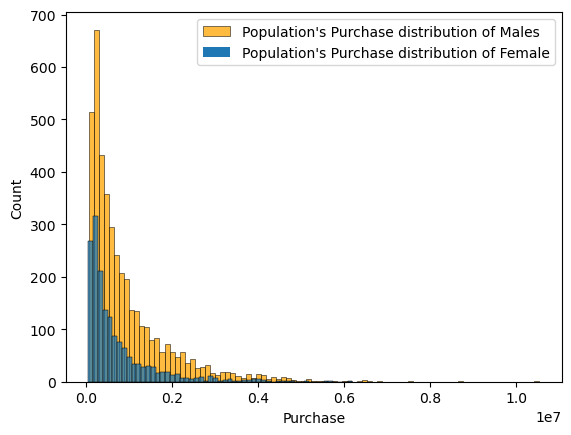

In [64]:
sns.histplot(pur_sum_m, color="orange")
sns.histplot(pur_sum_f)

plt.legend(["Population's Purchase distribution of Males", "Population's Purchase distribution of Female"])

In [65]:
# creating array of means of purchase by males with sample size=700
sm1 = []

for reps in range(2000):
    s1 = np.random.choice(pur_sum_m, size=700)
    means = np.mean(s1)
    sm1.append(means)
sm1 = np.array(sm1)

In [66]:
# creating array of means of purchase by females with sample size=700
sf1 = []

for reps in range(2000):
    s1 = np.random.choice(pur_sum_f, size=700)
    means = np.mean(s1)
    sf1.append(means)
sf1 = np.array(sf1)

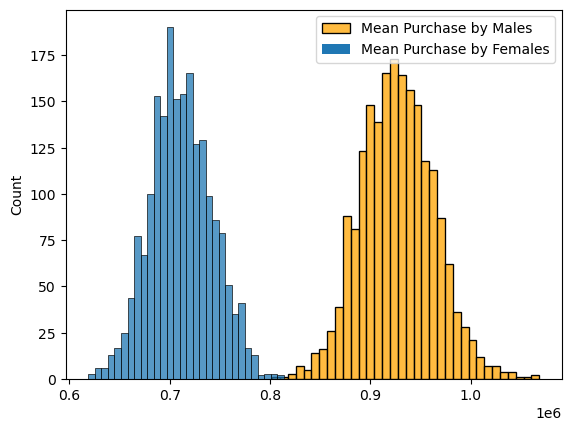

In [86]:
# We can see that sample means are normally distributed
sns.histplot(sm1, color="orange")
sns.histplot(sf1)

plt.legend(["Mean Purchase by Males", "Mean Purchase by Females"])

In [68]:
def calc_CI(mean, std, confidence):
    # calculate std_error
    std_error = std
    print("Standard Error: ", std_error)

    # calculate the remaining fractions
    frac = (1 - (confidence/100)) / 2

    # calculate z1 and z2
    z1 = norm.ppf(frac)
    z2 = norm.ppf(1 - frac)

    # calculate end points
    x1 = mean + (z1 * std_error)
    x2 = mean + (z2 * std_error)

    return np.round((x1, x2), 2)

In [69]:
# taking 95% confidence level
# Confidence Interval (CI) for purchases by males
print(f"Male_CI for 95% confidence level: {calc_CI(sm1.mean(), sm1.std(), 95)}")

Standard Error:  36598.87197510574
Male_CI for 95% confidence level: [855162.52 998627.46]


In [70]:
# taking 95% confidence level
# Confidence Interval (CI) for purchases by females
print(f"Female_CI for 95% confidence level: {calc_CI(sf1.mean(), sf1.std(), 95)}")

Standard Error:  30858.59149417764
Female_CI for 95% confidence level: [650913.73 771877.19]


In [79]:
print(f"Male_CI for 90% confidence level: {np.percentile(sm1, [5, 95])}")
print(f"Female_CI for 90% confidence level: {np.percentile(sf1, [5, 95])}")

Male_CI for 90% confidence level: [870231.51835714 986304.17328571]
Female_CI for 90% confidence level: [662310.12164286 764344.85335714]


## How Married vs Unmarried compare?

In [80]:
# grouping by User_ID
pur_sum_mr = df[df["Marital_Status"]==1].groupby("User_ID")["Purchase"].sum()
pur_sum_umr = df[df["Marital_Status"]==0].groupby("User_ID")["Purchase"].sum()

In [82]:
print(f"avg money spent per transaction by married: {pur_sum_mr.mean()}")
print(f"avg money spent per transaction by unmarried: {pur_sum_umr.mean()}")

avg money spent per transaction by married: 843526.7966855295
avg money spent per transaction by unmarried: 880575.7819724905


In [84]:
smr1 = []

for reps in range(2000):
    s1 = np.random.choice(pur_sum_mr, size=700)
    means = np.mean(s1)
    smr1.append(means)
smr1 = np.array(smr1)

In [85]:
sumr1 = []

for reps in range(2000):
    s1 = np.random.choice(pur_sum_umr, size=700)
    means = np.mean(s1)
    sumr1.append(means)
sumr1 = np.array(sumr1)

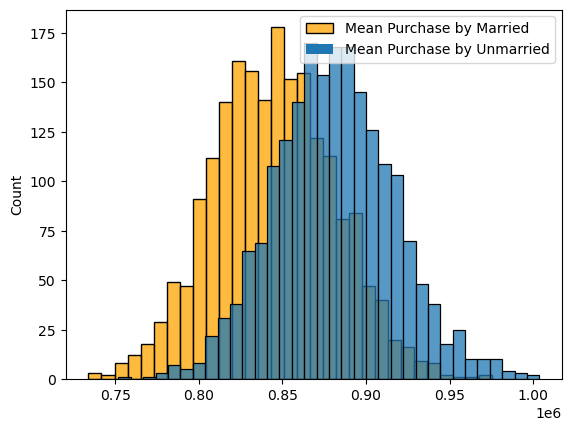

In [87]:
# We can see that means of the samples are normally distributed
sns.histplot(smr1, color="orange")
sns.histplot(sumr1)

plt.legend(['Mean Purchase by Married', 'Mean Purchase by Unmarried'])

In [88]:
print(f"Married_CI for 95% confidence level: {np.percentile(smr1, [2.5, 97.5])}")
print(f"Unmarried_CI for 95% confidence level: {np.percentile(sumr1, [2.5, 97.5])}")

Married_CI for 95% confidence level: [774588.01521429 916056.92367857]
Unmarried_CI for 95% confidence level: [812530.67896429 955463.36039286]


## How the distribution compare Age wise?

In [89]:
# Analysisng top3 age groups
pur_18_25 = df[df["Age"]=="18-25"].groupby("User_ID")["Purchase"].sum()
pur_26_35 = df[df["Age"]=="26-35"].groupby("User_ID")["Purchase"].sum()
pur_36_45 = df[df["Age"]=="36-45"].groupby("User_ID")["Purchase"].sum()

In [90]:
s_18_25 = []

for reps in range(2000):
    s1 = np.random.choice(pur_18_25, size=700)
    means = np.mean(s1)
    s_18_25.append(means)
s_18_25 = np.array(s_18_25)

In [91]:
s_26_35 = []

for reps in range(2000):
    s1 = np.random.choice(pur_26_35, size=700)
    means = np.mean(s1)
    s_26_35.append(means)
s_26_35 = np.array(s_26_35)

In [92]:
s_36_45 = []

for reps in range(2000):
    s1 = np.random.choice(pur_36_45, size=700)
    means = np.mean(s1)
    s_36_45.append(means)
s_36_45 = np.array(s_36_45)

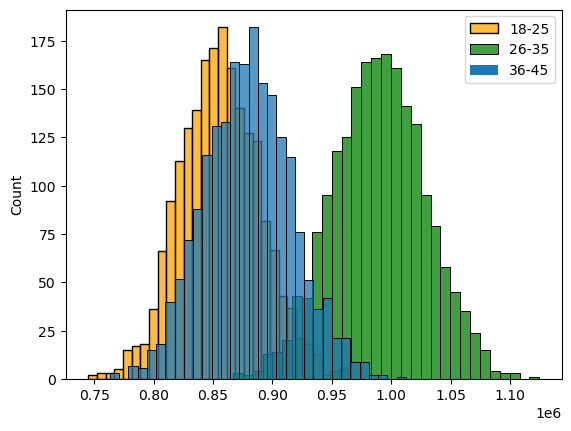

In [93]:
sns.histplot(s_18_25, color="orange")
sns.histplot(s_26_35, color = "green")
sns.histplot(s_36_45)

plt.legend(['18-25', '26-35', '36-45'])

In [98]:
print(f"CI of 18-25 age group for 95% confidence level: {np.round(np.percentile(s_18_25, [2.5, 97.5]), 3)}")
print(f"CI of 26-35 age group for 95% confidence level: {np.round(np.percentile(s_26_35, [2.5, 97.5]), 3)}")
print(f"CI of 36-45 age group for 95% confidence level: {np.round(np.percentile(s_36_45, [2.5, 97.5]), 3)}")

CI of 18-25 age group for 95% confidence level: [794725.685 922877.003]
CI of 26-35 age group for 95% confidence level: [ 913406.975 1066179.855]
CI of 36-45 age group for 95% confidence level: [810512.677 955290.686]


# Key Insights & Recommendations:
